Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
# cell for imports. All imports must go here.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [ ]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

In [ ]:
survived_count = df['Survived'].value_counts()
survived_count

Survived
0    549
1    342
Name: count, dtype: int64

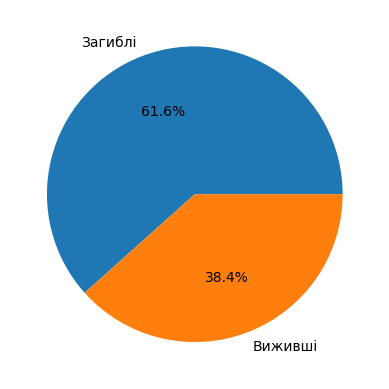

In [ ]:
plt.pie(survived_count, labels=['Загиблі', 'Виживші'], autopct='%1.1f%%')
plt.show()

*прокоментуйте отримані візуалізації

Більшість загибли

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


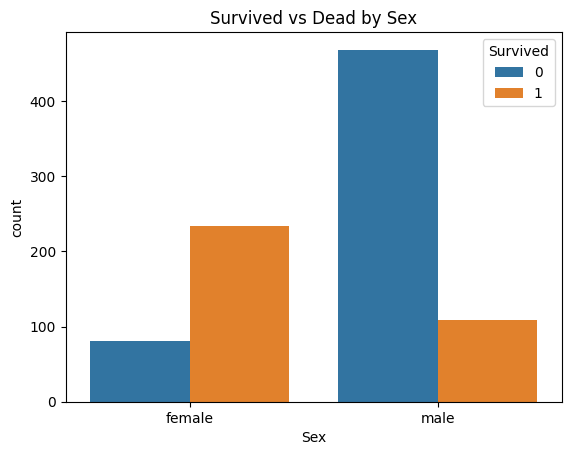

In [ ]:
group = df.groupby(['Sex', 'Survived'], as_index=False).size()

survived = group[group['Survived'] == 1]
dead = group[group['Survived'] == 0]
group[group['Survived'] == 0]

,Sex,Survived,size
0,female,0,81
2,male,0,468


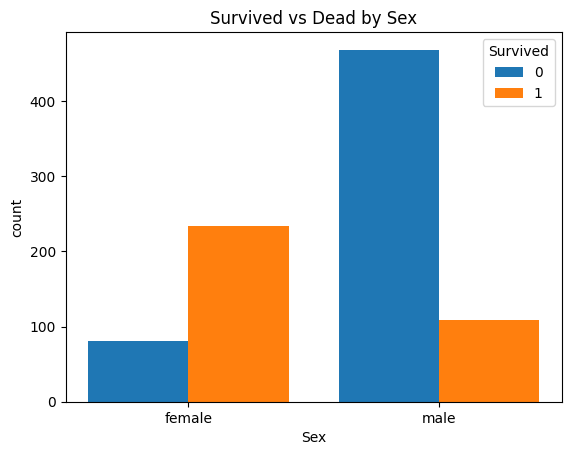

In [ ]:
fig, ax = plt.subplots()
x = np.arange(2)

bar_width = 0.4

b1 = ax.bar(x, dead['size'], width=bar_width, label="0")

b2 = ax.bar(x + bar_width, survived['size'], width=bar_width, label="1")

plt.xlabel('Sex')
plt.ylabel('count')
plt.title('Survived vs Dead by Sex')
plt.xticks([i + bar_width/2 for i in x], ['female', 'male'])
plt.legend(title="Survived")
plt.show()

*прокоментуйте отримані візуалізації
кількість загиблих чоловіків більше ніж кількість жінок в цілому, також кількість загиблих жінок менша ніж виживших чоловіків, виживших жінок в двічі більше ніж виживших чоловіків.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

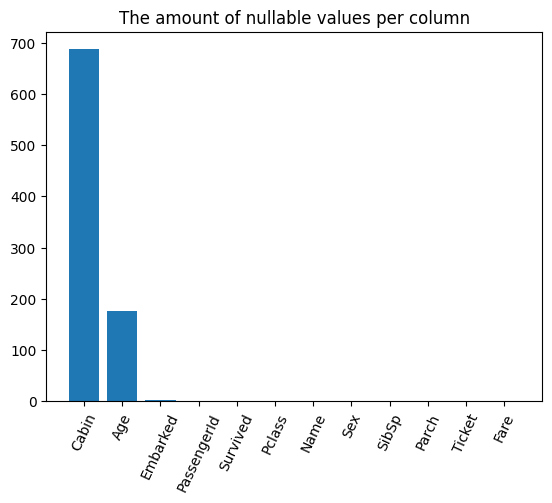

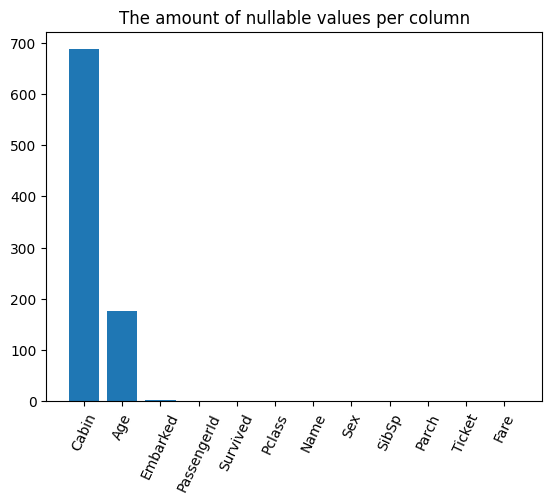

In [ ]:
sum = df.isnull().sum().sort_values(ascending=False)
plt.bar(sum.keys(), sum)
plt.xticks(rotation=65)
plt.title('The amount of nullable values per column')
plt.show()

*прокоментуйте отримані візуалізації

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

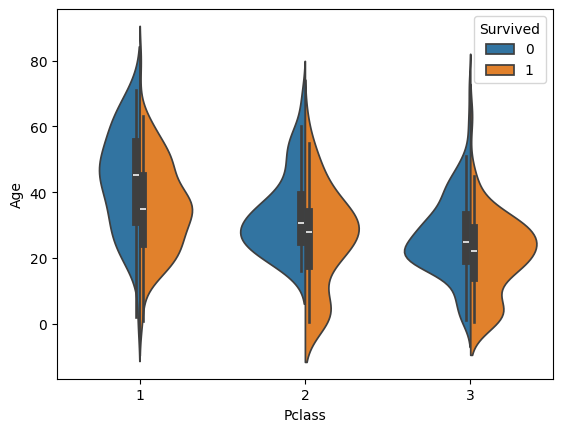

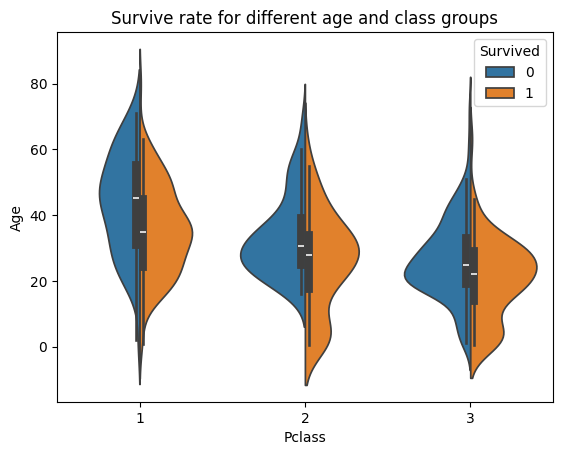

In [186]:
group = df.groupby(["Age", "Survived", "Pclass"], as_index=False).apply(lambda x: x)

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=group, split=True)
plt.xlabel('Pclass')
plt.title("Survive rate for different age and class groups")
plt.ylabel('Age')
plt.show()

*прокоментуйте отримані візуалізації

на осі x відображається клас пасажирів, на осі y їх вік. На скрипках можна побачити співідношення загиблих та виживших.


6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


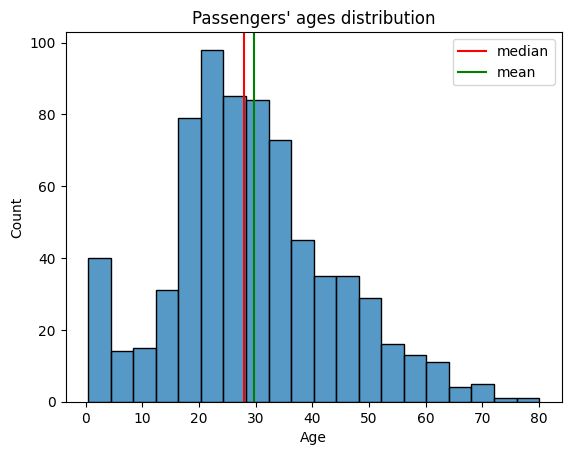

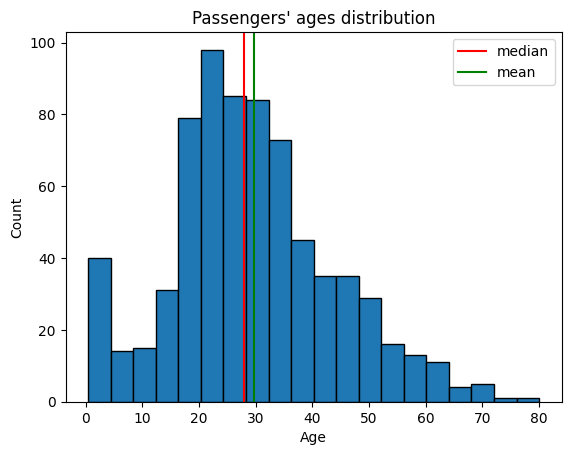

In [209]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()

plt.axvline(median_age, color='red', linewidth=1.5, label='median')
plt.axvline(mean_age, color='green', linewidth=1.5, label='mean')
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

*прокоментуйте отримані візуалізації

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

Як клас пасажира впливає на ймовірність виживання?

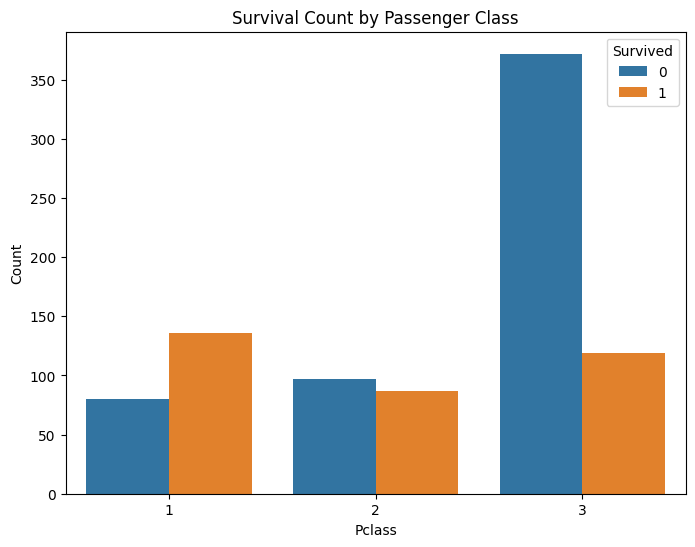

In [212]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

*прокоментуйте отримані візуалізації

З графіку можна побачити що з першого класу вижило більшість, в другому менше половини, в третьому найменший відсоток виживших

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

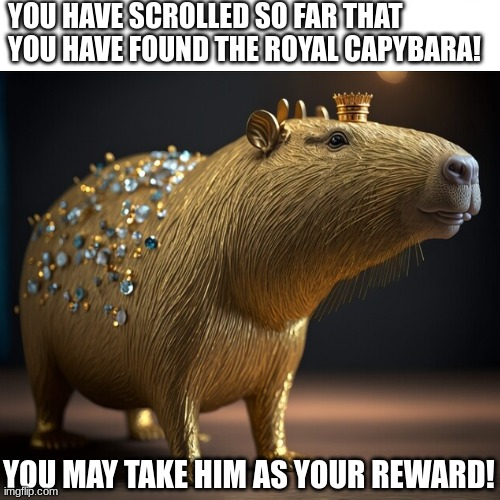